## Compulsory Task - Titanic 

Hemant Thapa

### 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2. READING DATASET

In [2]:
#LOading dataset
train_dataset = pd.read_csv("Titanic.csv")
test_dataset = pd.read_csv("Titanic.csv")
train_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### <FONT COLOR='BLUE'>3. PRE-PROCESSING (FIND ERRORS OR MISSING VALUES)

In [3]:
#checking missing values
train_dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
#total missing values in numerical form
missing_values_count = train_dataset.isnull().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 4. CALCUALTING MISSING VALUE PERCENTAGE

In [5]:
# how many total missing values do we have?
total_cells = np.product(train_dataset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f'Missing value: {(total_missing/total_cells) * 100}%')

#Seems like only 8.0995% of the values are missing

Missing value: 8.099513655069211%


In [6]:
#Inspecting all dataset
findcolumns=train_dataset.columns
for word in findcolumns:
    print("\033[1m column %s unique values are : \n"% word,train_dataset[word].unique(),"\n","--------------------------------------------------------------")

 column PassengerId unique values are : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

### 5. DATA STRUCTURES

In [7]:
#data structures
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 6. CHECKING COLUMNS AND ROWS

In [8]:
#columns and rows
train_dataset.shape

(891, 12)

In [9]:
#Checking columns
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#distributing into survival and casualties
train_dataset["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 7. CHECKING GENDER

male      577
female    314
Name: Sex, dtype: int64


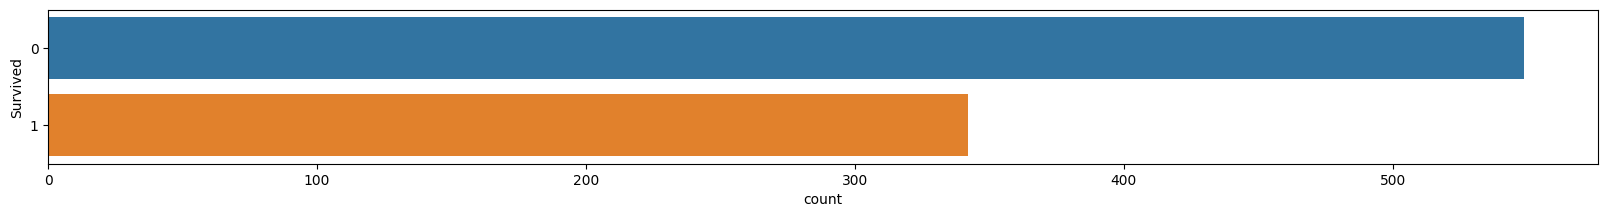

In [11]:
# How many are Male and Female
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived', data=train_dataset);
print(train_dataset.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


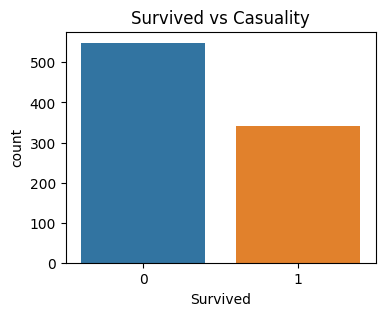

In [12]:
#plotting casulaity vs survival chart
print(train_dataset['Sex'].value_counts());
plt.figure(figsize=(4,3))
sns.countplot(x="Survived", data=train_dataset)
plt.title("Survived vs Casuality")
plt.show() 

In [13]:
print("Fraud transction ratio: ", len(train_dataset[train_dataset["Survived"]==1])/len(train_dataset["Survived"]))

Fraud transction ratio:  0.3838383838383838


In [14]:
print("Fraud transction ratio: ", len(train_dataset[train_dataset["Survived"]==0])/len(train_dataset["Survived"]))

Fraud transction ratio:  0.6161616161616161


male      577
female    314
Name: Sex, dtype: int64


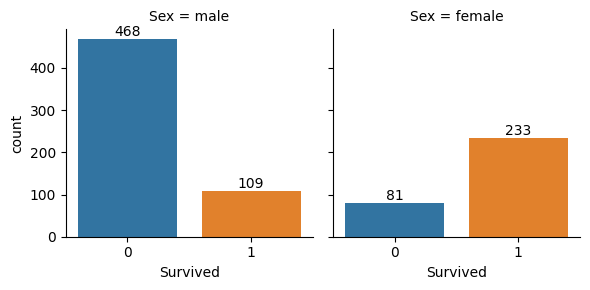

In [15]:
print(train_dataset['Sex'].value_counts());
graph = sns.catplot(x='Survived', col='Sex', kind='count', data=train_dataset, height=3, aspect=1)
axes = graph.axes.flatten()
for ax in axes:
    for i in ax.containers:
        ax.bar_label(i)
        
#It shows greater number of casuality than survival rate

In [16]:
#calulating total male survived
male_survived = train_dataset[train_dataset['Sex'] == 'male']['Survived'].sum()
#calulating totla male
male_total = train_dataset[train_dataset['Sex'] == 'male']['Survived'].count()
#calculating male survived ratio
male_survival_rate = male_survived / male_total

#calculating total female survived
female_survived = train_dataset[train_dataset['Sex'] == 'female']['Survived'].sum()
#calculating total female
female_total = train_dataset[train_dataset['Sex'] == 'female']['Survived'].count()
#calculating female survived ratio
female_survival_rate = female_survived / female_total

#printing result on screen
print("Male Survival Percentage: ", male_survival_rate*100,"%")
print("Female Survival Percentage: ", female_survival_rate*100,"%")

Male Survival Percentage:  18.890814558058924 %
Female Survival Percentage:  74.20382165605095 %


### TEST DATASET

In [17]:
#checking missing value in precentage
#Cabin and age have the maximum missing values
round(100*(test_dataset.isnull().sum().sort_values(ascending=False)/len(test_dataset.index)),4)

Cabin          77.1044
Age            19.8653
Embarked        0.2245
PassengerId     0.0000
Survived        0.0000
Pclass          0.0000
Name            0.0000
Sex             0.0000
SibSp           0.0000
Parch           0.0000
Ticket          0.0000
Fare            0.0000
dtype: float64

In [18]:
#checking the mean and max value
train_dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### 8. CHECKING TITLE

In [19]:
#Creting new columns for title in train dataset
train_dataset['Title']=train_dataset['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
train_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [20]:
#Creting new columns for title in test dataset
test_dataset['Title']=test_dataset['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
test_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [21]:
#Counting titles
title_count = train_dataset["Title"].value_counts()
title_count

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

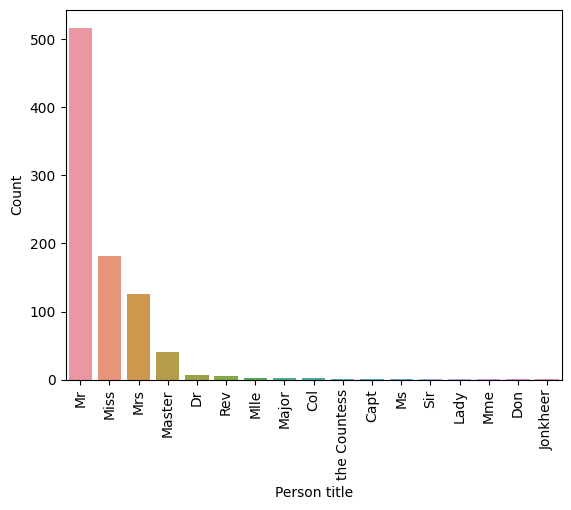

In [22]:
#Counting titles
title_count = train_dataset["Title"].value_counts()
#Converting dataframe to dictonary
dataset_title_dic = title_count.to_dict()
#plotting bar graph
sns.barplot(x=list(dataset_title_dic.keys()), y=list(dataset_title_dic.values()))
#labeling xticks into 90 degree angle
plt.xticks(rotation=90)
plt.xlabel("Person title")
plt.ylabel("Count")
plt.show()

In [23]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [24]:
#List of the unique values in 'Title' columns
train_dataset.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
#Title according to age
title_list = ['Mrs', 'Mr', 'Master', 'Miss']
train_dataset.loc[~train_dataset['Title'].isin(title_list),['Age', 'Sex', 'Title']]

,Age,Sex,Title
30,40.0,male,Don
149,42.0,male,Rev
150,51.0,male,Rev
245,44.0,male,Dr
249,54.0,male,Rev
317,54.0,male,Dr
369,24.0,female,Mme
398,23.0,male,Dr
443,28.0,female,Ms
449,52.0,male,Major


In [26]:
#counting title in group
def title(a):
    title = a['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer','Rev', 'Col', 'Sir', 'Master']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if a['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [27]:
title_group = train_dataset['Title']=train_dataset.apply(title, axis=1)
title_group = train_dataset['Title'].value_counts()
title_group

Mr      577
Miss    185
Mrs     129
Name: Title, dtype: int64

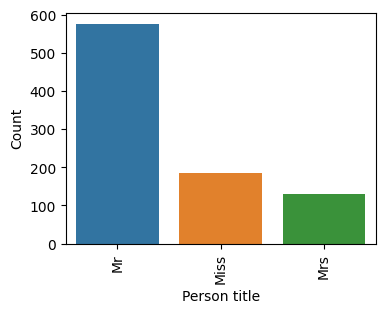

In [28]:
#Converting dataframe to dictonary
dataset_title_dic = title_group.to_dict()
#plotting bar graph
plt.figure(figsize=(4,3))
sns.barplot(x=list(dataset_title_dic.keys()), y=list(dataset_title_dic.values()))
#labeling xticks into 90 degree angle
plt.xticks(rotation=90)
plt.xlabel("Person title")
plt.ylabel("Count")
plt.show()

In [29]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3}
train_dataset['Title'] = train_dataset['Title'].map(title_mapping)
train_dataset['Title'] = train_dataset['Title'].fillna(0)

In [30]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3}
test_dataset['Title'] = test_dataset['Title'].map(title_mapping)
test_dataset['Title'] = test_dataset['Title'].fillna(0)

### 9. CHECKING TITLE & AGE

#### Missing Value Imputation

In [31]:
for i, j in enumerate(title_mapping.keys()):
    print(i+1,':', j)

1 : Mr
2 : Miss
3 : Mrs


In [32]:
#Mean on title
#Checking mean into subclass for imputing null values of age
train_dataset.groupby(['Title'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
1,453.0,30.726645,14.678201,0.42,21.00,29.0,39.00,80.0
2,149.0,21.845638,12.870542,0.75,14.50,21.0,30.00,63.0
3,112.0,35.991071,11.411623,14.00,27.75,35.0,44.25,63.0


In [33]:
train_dataset.groupby(['Title'])['Age'].mean()

Title
1    30.726645
2    21.845638
3    35.991071
Name: Age, dtype: float64

In [34]:
#Median on title
#Checking median into subclass for imputing null values of age
train_dataset.groupby(['Title'])['Age'].median()

Title
1    29.0
2    21.0
3    35.0
Name: Age, dtype: float64

#### According to above observation mean and median:
    
1 : Mr - Mean value is 30 and median is 29

2 : Miss - Mean value is 21 and median is 21

3 : Mrs - Mean value is 35 and median is 35

In [35]:
round(100*train_dataset.isnull().sum().sort_values(ascending=False)/len(train_dataset.index),2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Title           0.00
dtype: float64

In [36]:
train_dataset.Age.isnull().sum()

177

In [37]:
#Calulating null values in age
title = train_dataset['Title'].value_counts()
a = dict(title)
for k, v in a.items():
    print(f'Value of {k} Class with Null values {train_dataset.loc[(train_dataset.Title==k),["Age"]].isnull().sum()}')


Value of 1 Class with Null values Age    124
dtype: int64
Value of 2 Class with Null values Age    36
dtype: int64
Value of 3 Class with Null values Age    17
dtype: int64


In [38]:
#Comapring missing value 
#Missing value converge
train_dataset.Age.isnull().sum() == 124+36+17 

True

In [39]:
#Impute missing values
for k, v in a.items():
    missing_values = train_dataset.loc[(train_dataset.Title==k) & ~(train_dataset.Age.isnull()), ['Age']].median(axis=0, skipna=True).astype('float')
    train_dataset.loc[(train_dataset.Title==k)&(train_dataset.Age.isnull()), 'Age'] = train_dataset.loc[(train_dataset.Title==k)&(train_dataset.Age.isnull()), 'Age'].replace(np.nan, missing_values.median())

In [40]:
title = test_dataset['Title'].value_counts()
b= dict(title)
for k, v in a.items():
                print('Value of {} Class with Null Values {other}'.format(k, other=test_dataset.loc[(test_dataset.Title==k),['Age']].isnull().sum()))

Value of 1 Class with Null Values Age    119
dtype: int64
Value of 2 Class with Null Values Age    36
dtype: int64
Value of 3 Class with Null Values Age    17
dtype: int64


In [41]:
#Impute missing values
for keys, values in b.items():
    missing_val=test_dataset.loc[(test_dataset.Title==keys) & ~(test_dataset.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
    test_dataset.loc[(test_dataset.Title==keys) & (test_dataset.Age.isnull()),'Age']=test_dataset.loc[(test_dataset.Title==keys) & (test_dataset.Age.isnull()),'Age'].replace(np.nan,missing_val.median())

In [42]:
# After Imputation on Age Colums, we have zero null values
train_dataset.Age.isnull().sum()

0

In [43]:
test_dataset.Age.isnull().sum()

0

### 10. CHECKING CABIN & FARE

In [44]:
test_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [45]:
#trying to figure out patterm in cabin and for embarked we can removed and imputed from median
test_dataset['Fare'].fillna(test_dataset['Fare'].median(), inplace=True)

In [46]:
#Printing all unique values
train_dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [47]:
#checking cabin with passenger class
class_cabin=train_dataset.groupby(['Pclass'])['Cabin'].count()
class_cabin

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

In [48]:
train_dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [49]:
sum(train_dataset.Pclass.value_counts())

891

In [50]:
Pclass = train_dataset['Pclass'].value_counts()
for k, v in (dict(Pclass)).items():
    print(f'Value of {k} passenger Class with Null Values {train_dataset.loc[(train_dataset.Pclass==k),["Cabin"]].isnull().sum()}')

Value of 3 passenger Class with Null Values Cabin    479
dtype: int64
Value of 1 passenger Class with Null Values Cabin    40
dtype: int64
Value of 2 passenger Class with Null Values Cabin    168
dtype: int64


In [51]:
cabin_check = train_dataset.loc[(train_dataset.Pclass==1)&~(train_dataset.Cabin.isnull()),['Cabin']]
cabin_check.tail(10)

,Cabin
849,C92
853,D28
857,E17
862,D17
867,A24
871,D35
872,B51 B53 B55
879,C50
887,B42
889,C148


In [52]:
cabin_check.shape

(176, 1)

In [53]:
train_dataset['Deck']=pd.Series(train_dataset.loc[~(train_dataset.Cabin.isnull()),['Cabin']].values.flatten()).astype('str').str[0]

In [54]:
top_deck = pd.Series(train_dataset['Cabin'].values.flatten().astype('str'))
top_deck_1 = []
for i in top_deck:
    if i != 'nan':
         top_deck_1.append(i[0])
    else:
        top_deck_1.append(i)

In [55]:
train_dataset['Deck'] = top_deck_1

In [56]:
train_dataset.loc[~(train_dataset.Cabin.isnull()), ['Cabin']].values.flatten()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [57]:
train_dataset['Deck']

0      nan
1        C
2      nan
3        C
4      nan
      ... 
886    nan
887      B
888    nan
889      C
890    nan
Name: Deck, Length: 891, dtype: object

In [58]:
#Counting nan values
train_dataset['Deck'].value_counts()

nan    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Deck, dtype: int64

In [59]:
#Checking unique values
train_dataset.Deck.unique()

array(['nan', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [60]:
train_dataset.Deck.isnull().sum()

0

In [61]:
#Replacing nan to GNR
train_dataset['Deck'] = train_dataset['Deck'].replace('nan', 'GNR')

In [62]:
#nan is renamed into GNR
train_dataset['Deck'].value_counts()

GNR    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Deck, dtype: int64

In [63]:
#Removing cabin colums
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Deck'],
      dtype='object')

In [64]:
train_dataset.drop('Cabin', axis =1, inplace=True)
test_dataset.drop('Cabin', axis =1, inplace=True)

In [65]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
Deck           0
dtype: int64

In [66]:
train_dataset[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,GNR
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,GNR


In [67]:
train_dataset.Embarked.isnull().sum()

2

In [68]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
#S is max occurance in Embarked
train_dataset.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [70]:
#Imputing null values in Embarked with value 'S' 
train_dataset.loc[(train_dataset.Embarked.isnull()),'Embarked']=train_dataset.loc[ (train_dataset.Embarked.isnull()),'Embarked'].replace(np.nan,'S')

### 11. COMPLETION OF DATA CLEANING

In [71]:
#No more missing values and data cleaning has completed
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

### <FONT COLOR='BLUE'> 12. POST PROCESSING - DATA VISULAISATION

In [72]:
train_dataset['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 21.  , 40.  , 66.  , 42.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [73]:
train_dataset['Age'].value_counts().describe()

count     88.000000
mean      10.125000
std       17.430197
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      144.000000
Name: Age, dtype: float64

In [74]:
age_counts = train_dataset['Age'].value_counts()
max_age = age_counts.idxmax()
print(max_age)

29.0


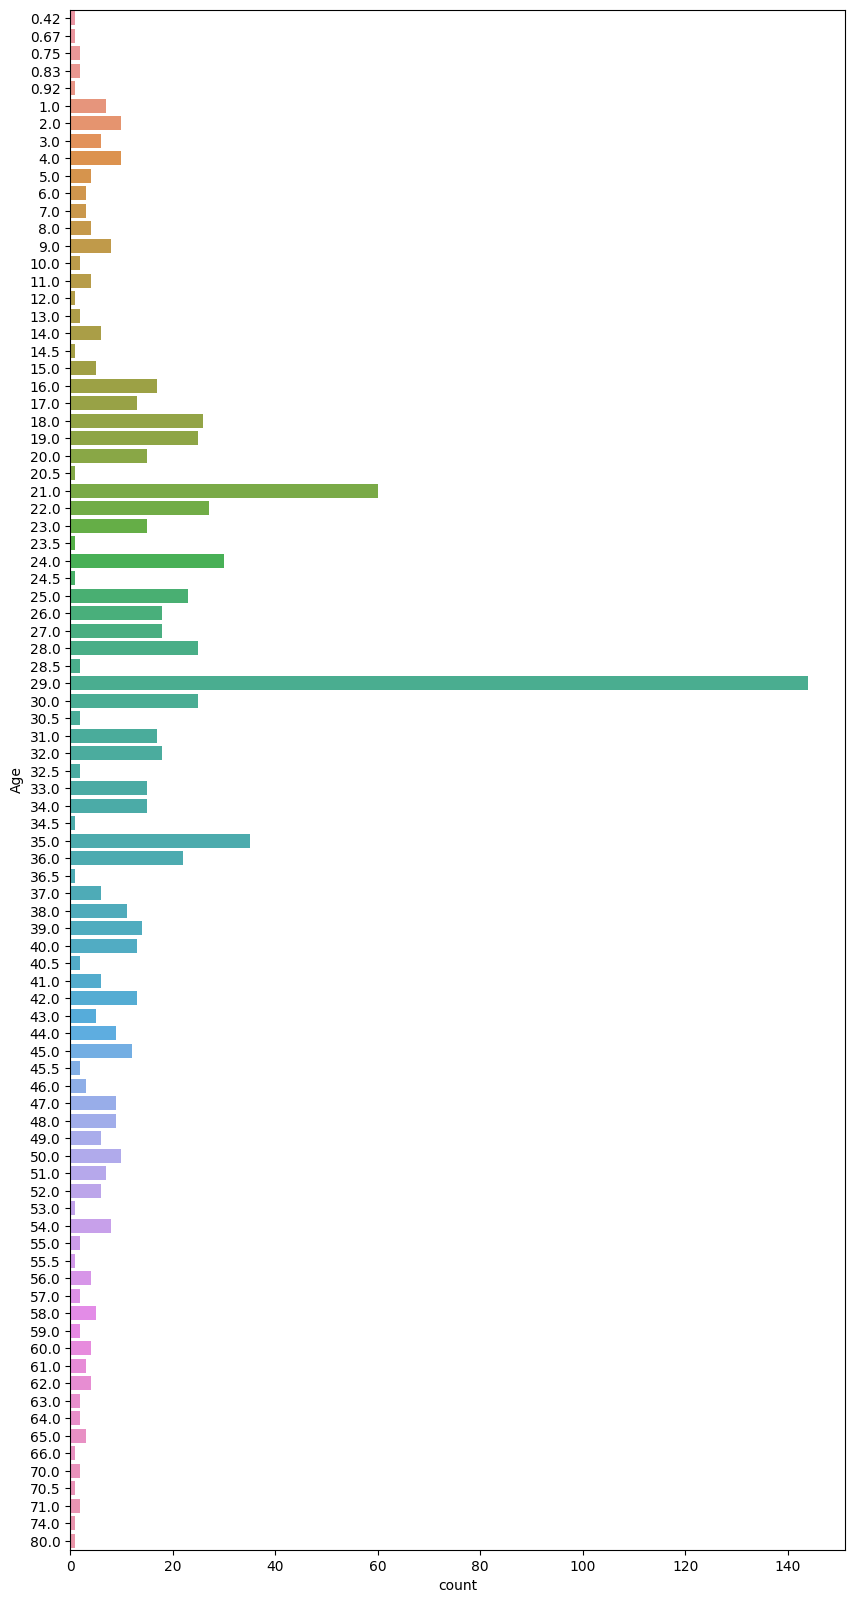

In [75]:
#People lost their life
#Most of Age 29 has lost their list
fig = plt.figure(figsize=(10,20))
sns.countplot(y='Age', data=train_dataset);

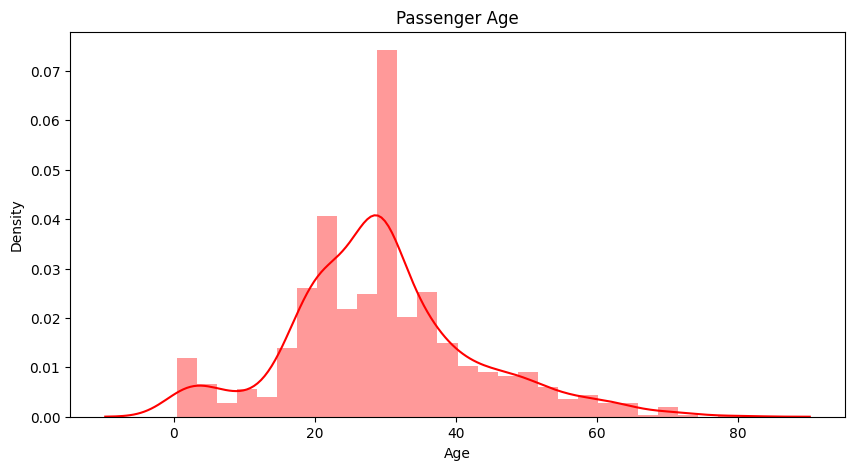

In [76]:
#plotting total passenger age
plt.figure(figsize=(10,5))
sns.distplot(train_dataset['Age'], color='red')
plt.title('Passenger Age')
plt.show()

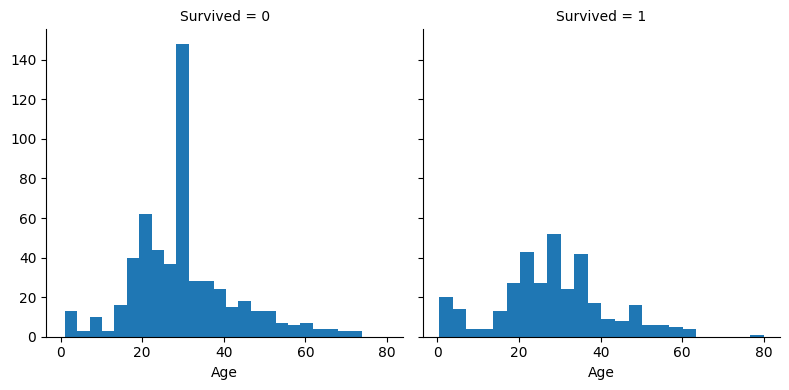

In [77]:
#Checking survival and casuality according to age
grid = sns.FacetGrid(train_dataset, col='Survived', height=4)
grid.map(plt.hist, 'Age', bins=24)
plt.show()

1. Passenger at age of 80 has survived 
2. Most of passenger on board are been 15 to 35 year olds
3.  Large number of non survival was between 15 to 29 year olds

In [78]:
pclass_counts = train_dataset['Pclass'].value_counts()
min_pclass = pclass_counts.idxmin()
max_pclass = pclass_counts.idxmax()
print(min_pclass)
print(max_pclass)

2
3


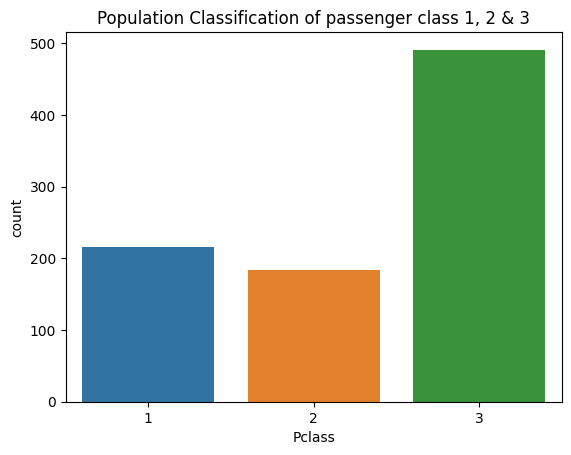

In [79]:
sns.countplot(x='Pclass', data=train_dataset)
plt.title('Population Classification of passenger class 1, 2 & 3')
plt.show()

1. Max populated Passenger class is 3
2. Minimum populated passenger class is 1 

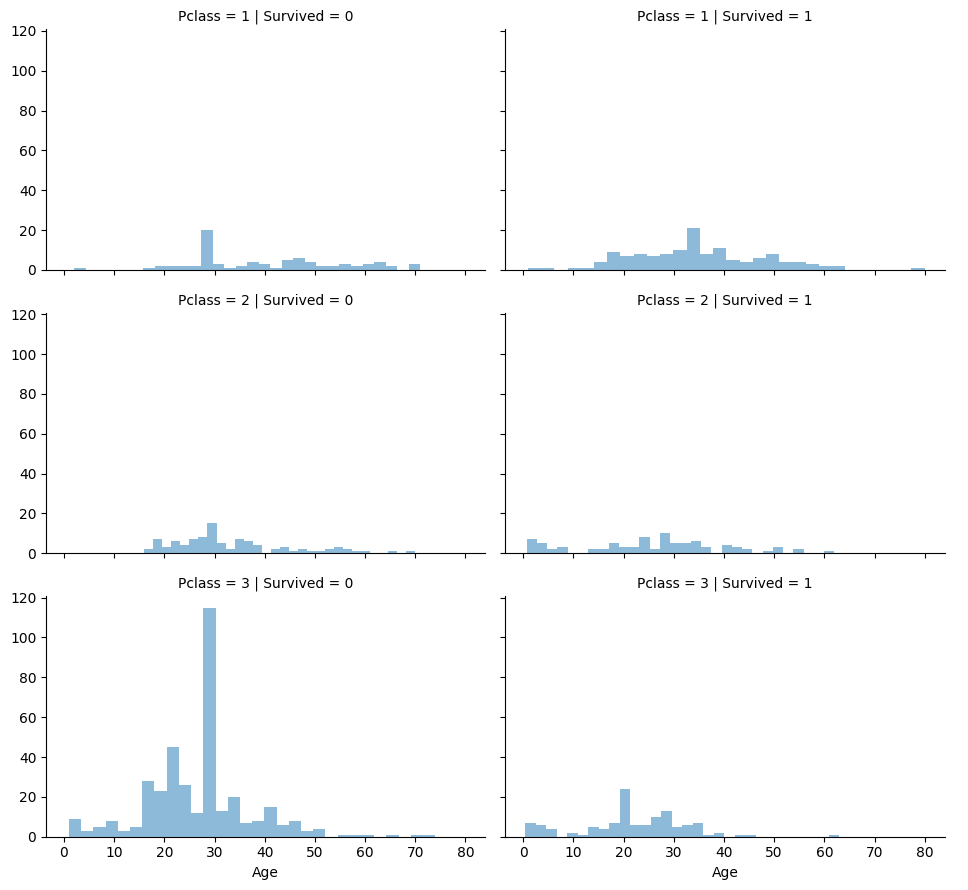

In [80]:
grid = sns.FacetGrid(train_dataset, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend()
plt.show()

1. Pclass 3 has most populated and least survived rate
2. Pclass 1 has first highest survived rate
3. Pclass 2 has second highest survive rate

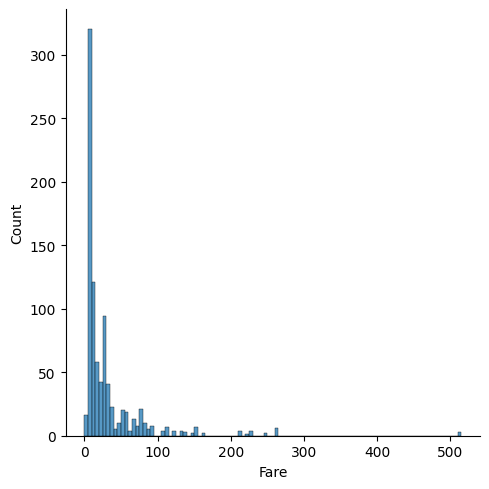

In [81]:
sns.displot(train_dataset['Fare'], binwidth=5, kde=False)
plt.show()

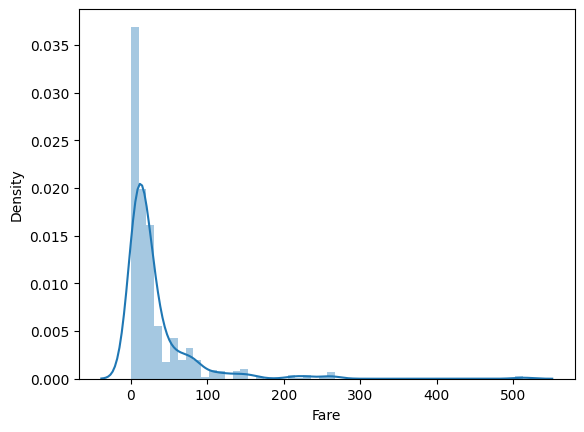

In [82]:
sns.distplot(train_dataset['Fare'])
plt.show()

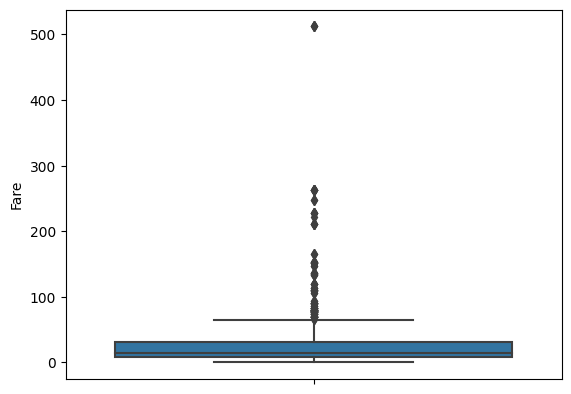

In [83]:
sns.boxplot(y=train_dataset['Fare'])
plt.show()

In [84]:
#Checking for Outlier
train_dataset.Fare.describe(percentiles=[.25,.5,.75,.90,.91,.92,.93,.94,.95,.96,.97,.98,.99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
91%       79.200000
92%       82.170800
93%       88.322940
94%       93.500000
95%      112.079150
96%      133.990000
97%      151.550000
98%      211.337500
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

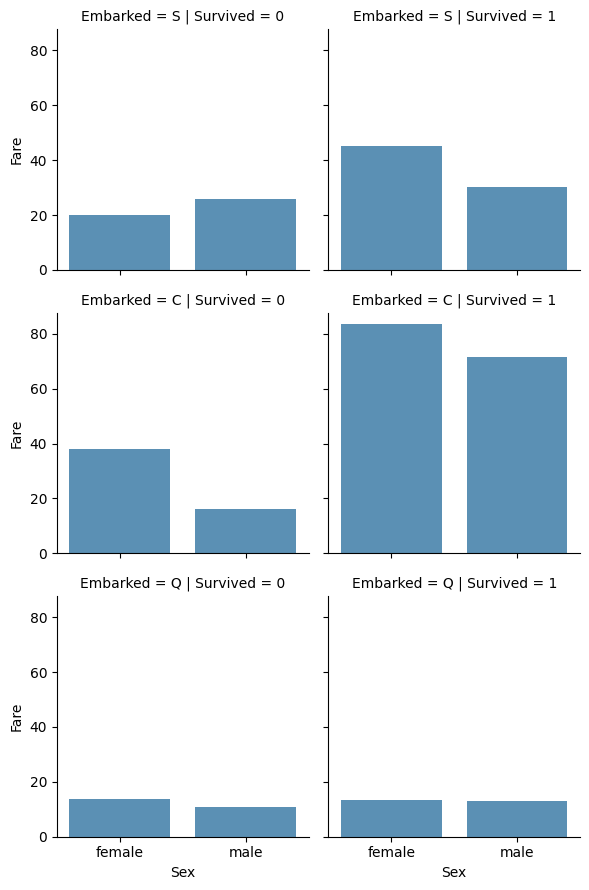

In [85]:
grid = sns.FacetGrid(train_dataset, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
plt.show()

1. Higher fare paid passeger has survived most and had better survival rate
2. low fare paid passenger has low survival rate
3. Embarkation correlates with survival rates

male      577
female    314
Name: Sex, dtype: int64


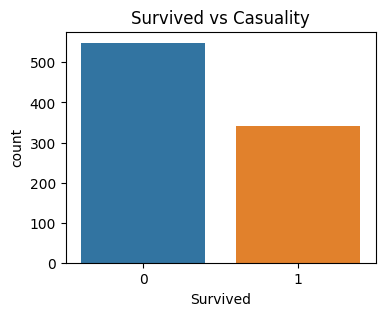

In [86]:
#plotting casulaity vs survival chart
print(train_dataset['Sex'].value_counts());
plt.figure(figsize=(4,3))
sns.countplot(x="Survived", data=train_dataset)
plt.title("Survived vs Casuality")
plt.show() 

In [87]:
#Checing survival percentage
#38.38 percent of the total have survived
survival_percentage = (sum(train_dataset['Survived']))/len(train_dataset['Survived'].index)*100
print(f'Survival percentage: {round(survival_percentage,2)}%')

Survival percentage: 38.38%


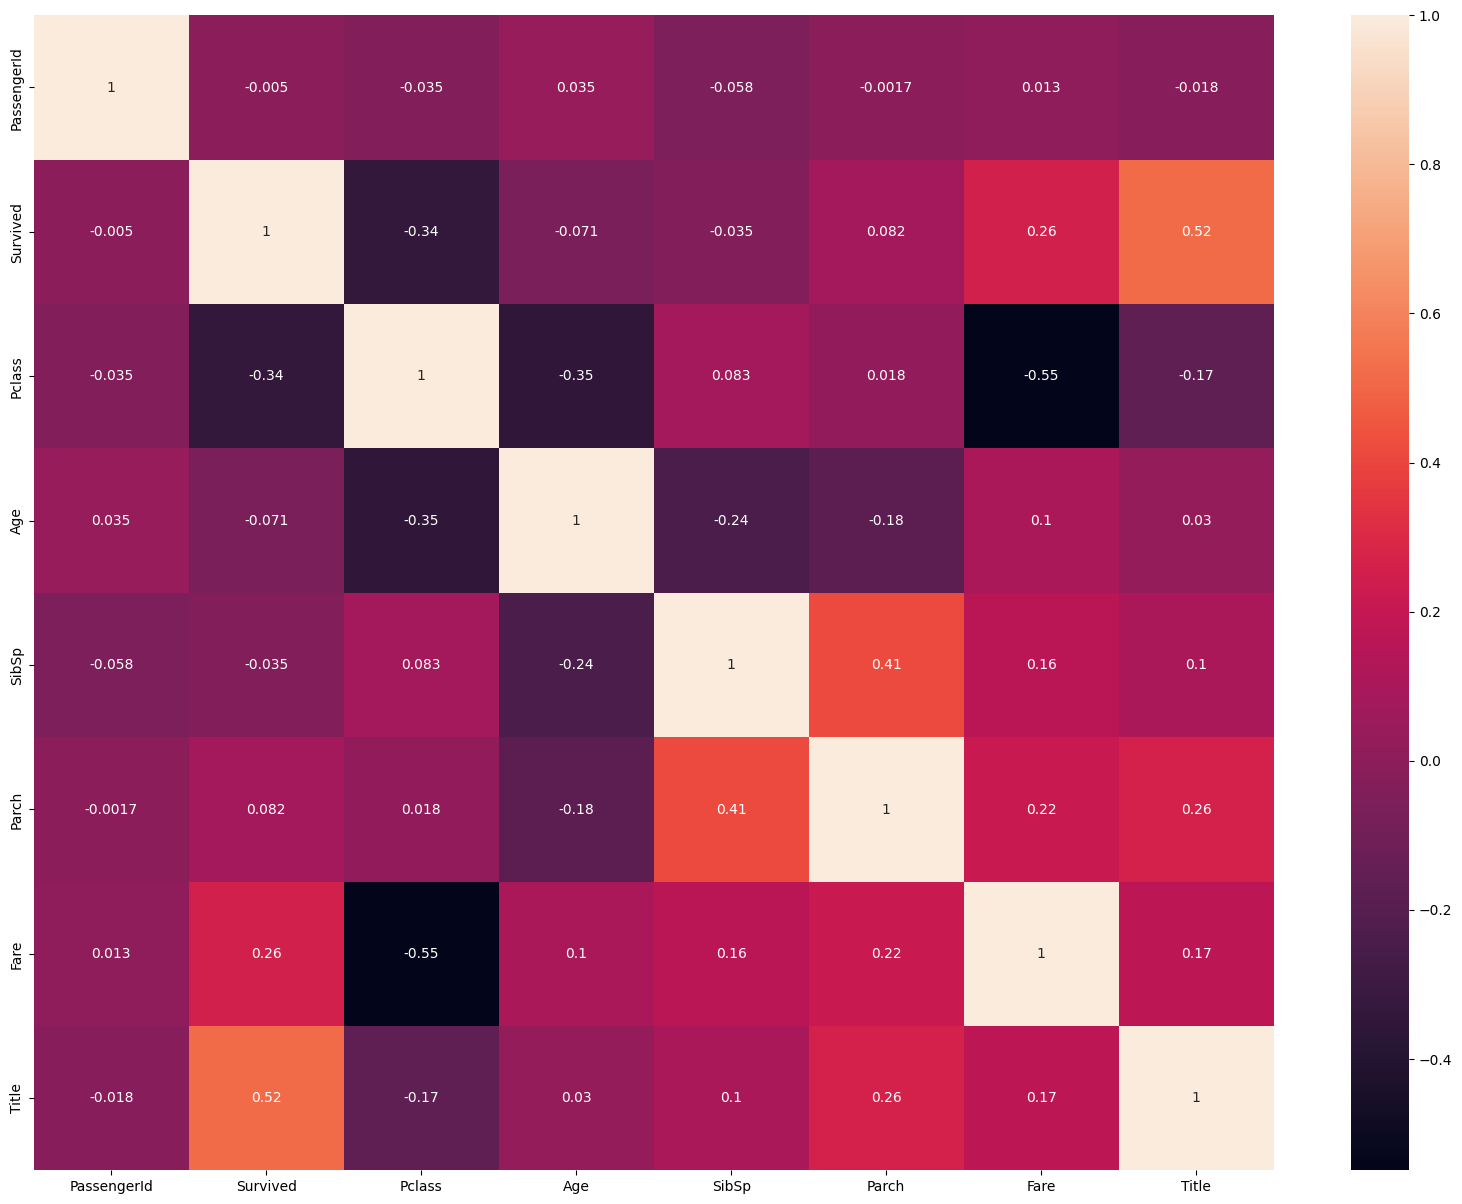

In [88]:
#Removing name and checking correlation matrix
train_dataset.drop(['Name'], axis=1, inplace=True)
test_dataset.drop(['Name'], axis=1, inplace=True)
plt.figure(figsize=(20,15))
sns.heatmap(train_dataset.corr(), annot=True)
plt.show()

 Mostly neagtive correlation betweem Pclass, Age, Fare rest there is no big correlation

In [89]:
#Check the Survival rate by Paasaenger Class
a = train_dataset.groupby(['Pclass','Survived']).agg({'Pclass': 'sum'})
a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Pclass
Pclass Survived           
1      0         37.037037
       1         62.962963
2      0         52.717391
       1         47.282609
3      0         75.763747
       1         24.236253

 Highest survival was on PClass 1 and lowest survival was on Pclass 3

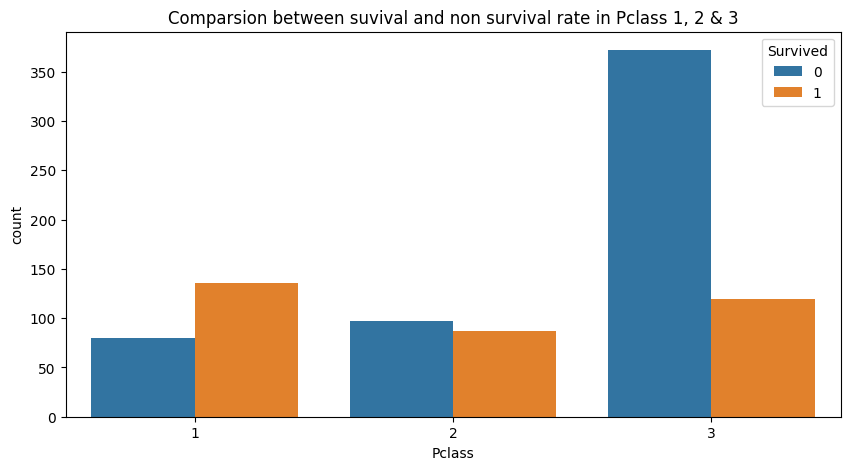

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(x="Pclass", hue="Survived", data=train_dataset)
plt.title('Comparsion between suvival and non survival rate in Pclass 1, 2 & 3')
plt.show()

1. Most affected passenger was on PClass 3 and than Pclass1 2 
2. Technically not taking account into non -survival rate and focused into calculating Most survived rate than on survival ranking can be measured according to Pclass 1,  3 and 2 

In [91]:
a = train_dataset.groupby(['Pclass','Sex','Survived']).agg({'Pclass': 'sum'})
a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Pclass
Pclass Sex    Survived           
1      female 0          1.388889
              1         42.129630
       male   0         35.648148
              1         20.833333
2      female 0          3.260870
              1         38.043478
       male   0         49.456522
              1          9.239130
3      female 0         14.663951
              1         14.663951
       male   0         61.099796
              1          9.572301

In [92]:
print( round(train_dataset [['Sex','Survived']].groupby(['Sex']).mean()*100,1),'\n')
print(train_dataset [['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).agg(['count','mean']))

        Survived
Sex             
female      74.2
male        18.9 

              Survived          
                 count      mean
Pclass Sex                      
1      female       94  0.968085
       male        122  0.368852
2      female       76  0.921053
       male        108  0.157407
3      female      144  0.500000
       male        347  0.135447


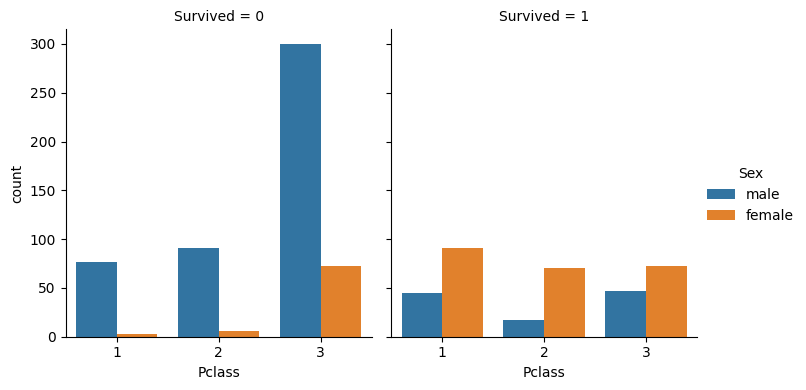

In [93]:
grid = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train_dataset, kind="count", height=4, aspect=.9)

1. During the evacuation time, female passengers were the first to be evacuated and that in all classes, female survivorship rates are greater. 

2. Male survivorship is extremely low, and since First Class is a premium class located close to the evacuation zone, we have witnessed the highest number of male survivors. Rest continues to decline.

3. On the first and second classes, respectively, 96% and 92% of the ladies were able to survive. 


In [94]:
# check the impact of Embarked Colum on Survival
print(round(train_dataset [['Embarked','Survived']].groupby(['Embarked']).mean()*100,1))

          Survived
Embarked          
C             55.4
Q             39.0
S             33.9


In [95]:
pclass = pd.crosstab(train_dataset['Survived'],train_dataset['Pclass']).apply(lambda r: (r/r.sum())*100, axis=1)
pclass

Pclass,1,2,3
Survived,,,
0,14.571949,17.668488,67.759563
1,39.766082,25.438596,34.795322


In [96]:
pclass = pd.crosstab(train_dataset['Survived'],[train_dataset['Pclass'],train_dataset['Sex']]).apply(lambda r: (r/r.sum())*100, axis=1)
pclass

Pclass            1                     2                     3           
Sex          female       male     female       male     female       male
Survived                                                                  
0          0.546448  14.025501   1.092896  16.575592  13.114754  54.644809
1         26.608187  13.157895  20.467836   4.970760  21.052632  13.742690

1. Data shows that female has highest survival rate.
2. survival rate has also depends on passanger class.

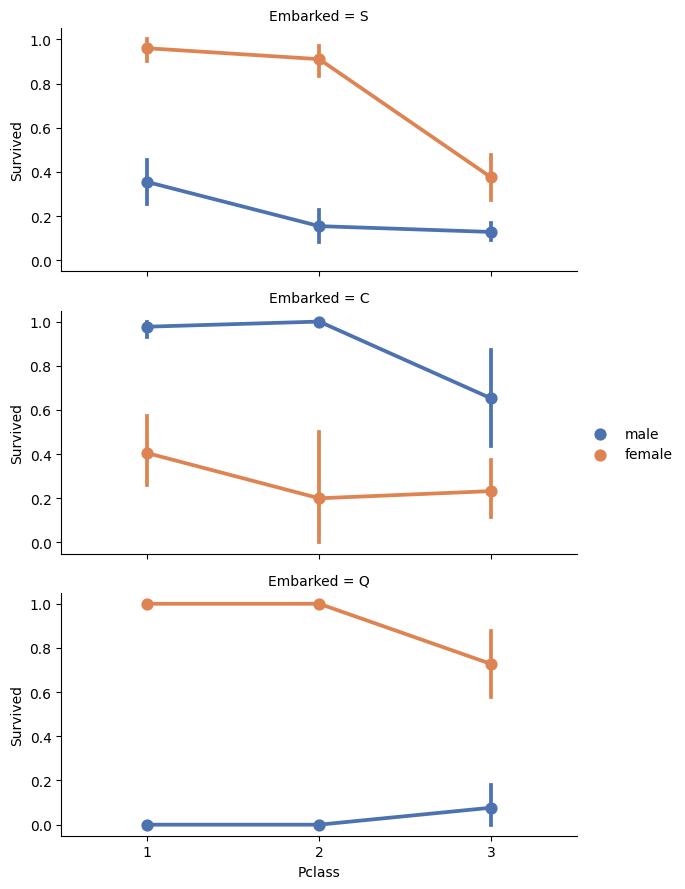

In [97]:
grid = sns.FacetGrid(train_dataset, row='Embarked', aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

#### INVESTIGATING UNDERAGE DATASET

In [98]:
#For loop seprating underage dataset from DataFrame
underage_rows = []
for index, row in train_dataset.iterrows():
    if row['Age'] < 18:
        underage_rows.append(row)

underage_df = pd.DataFrame(underage_rows)
underage_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
850,851,0,3,male,4.0,4,2,347082,31.2750,S,1,GNR
852,853,0,3,female,9.0,1,1,2678,15.2458,C,2,GNR
853,854,1,1,female,16.0,0,1,PC 17592,39.4000,S,2,D
869,870,1,3,male,4.0,1,1,347742,11.1333,S,1,GNR
875,876,1,3,female,15.0,0,0,2667,7.2250,C,2,GNR


In [99]:
# Total underage columns and rows
underage_df.shape

(113, 12)

In [100]:
underage_df[underage_df['Sex']=='male'].value_counts()

PassengerId  Survived  Pclass  Sex   Age    SibSp  Parch  Ticket             Fare      Embarked  Title  Deck
8            0         3       male  2.00   3      1      349909             21.0750   S         1      GNR     1
756          1         2       male  0.67   1      1      250649             14.5000   S         1      GNR     1
490          1         3       male  9.00   1      1      C.A. 37671         15.9000   S         1      GNR     1
501          0         3       male  17.00  0      0      315086             8.6625    S         1      GNR     1
533          0         3       male  17.00  1      1      2690               7.2292    C         1      GNR     1
550          1         2       male  8.00   1      1      C.A. 33112         36.7500   S         1      GNR     1
551          1         1       male  17.00  0      2      17421              110.8833  C         1      C       1
575          0         3       male  16.00  0      0      A/4. 20589         8.0500    S     

In [101]:
underage_df[underage_df['Sex']=='female'].value_counts()

PassengerId  Survived  Pclass  Sex     Age    SibSp  Parch  Ticket         Fare      Embarked  Title  Deck
10           1         2       female  14.00  1      0      237736         30.0708   C         3      GNR     1
643          0         3       female  2.00   3      2      347088         27.9000   S         2      GNR     1
447          1         2       female  13.00  0      1      250644         19.5000   S         2      GNR     1
449          1         3       female  5.00   2      1      2666           19.2583   C         2      GNR     1
470          1         3       female  0.75   2      1      2666           19.2583   C         2      GNR     1
480          1         3       female  2.00   0      1      3101298        12.2875   S         2      GNR     1
505          1         1       female  16.00  0      0      110152         86.5000   S         2      B       1
531          1         2       female  2.00   1      1      26360          26.0000   S         2      GNR    

In [102]:
#Total underage survived
survived_underage = underage_df.groupby('Survived').get_group(1)
survived_underage.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
830,831,1,3,female,15.00,1,0,2659,14.4542,C,3,GNR
831,832,1,2,male,0.83,1,1,29106,18.7500,S,1,GNR
853,854,1,1,female,16.00,0,1,PC 17592,39.4000,S,2,D
869,870,1,3,male,4.00,1,1,347742,11.1333,S,1,GNR
875,876,1,3,female,15.00,0,0,2667,7.2250,C,2,GNR


In [103]:
survived_underage.shape

(61, 12)

In [104]:
survived_underage_male = survived_underage.groupby('Sex').get_group('male')
survived_underage_male = survived_underage_male.groupby('Survived').get_group(1)
survived_underage_male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
78,79,1,2,male,0.83,0,2,248738,29.0000,S,1,GNR
125,126,1,3,male,12.00,1,0,2651,11.2417,C,1,GNR
165,166,1,3,male,9.00,0,2,363291,20.5250,S,1,GNR
183,184,1,2,male,1.00,2,1,230136,39.0000,S,1,F
193,194,1,2,male,3.00,1,1,230080,26.0000,S,1,F
220,221,1,3,male,16.00,0,0,SOTON/OQ 392089,8.0500,S,1,GNR
261,262,1,3,male,3.00,4,2,347077,31.3875,S,1,GNR
305,306,1,1,male,0.92,1,2,113781,151.5500,S,1,C
340,341,1,2,male,2.00,1,1,230080,26.0000,S,1,F
348,349,1,3,male,3.00,1,1,C.A. 37671,15.9000,S,1,GNR


In [105]:
survived_underage_female = survived_underage.groupby('Sex').get_group('female')
survived_underage_female = survived_underage_female.groupby('Survived').get_group(1)
survived_underage_female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
9,10,1,2,female,14.00,1,0,237736,30.0708,C,3,GNR
10,11,1,3,female,4.00,1,1,PP 9549,16.7000,S,2,G
22,23,1,3,female,15.00,0,0,330923,8.0292,Q,2,GNR
39,40,1,3,female,14.00,1,0,2651,11.2417,C,2,GNR
43,44,1,2,female,3.00,1,2,SC/Paris 2123,41.5792,C,2,GNR
58,59,1,2,female,5.00,1,2,C.A. 34651,27.7500,S,2,GNR
68,69,1,3,female,17.00,4,2,3101281,7.9250,S,2,GNR
84,85,1,2,female,17.00,0,0,SO/C 14885,10.5000,S,2,GNR
156,157,1,3,female,16.00,0,0,35851,7.7333,Q,2,GNR
172,173,1,3,female,1.00,1,1,347742,11.1333,S,2,GNR


In [106]:
non_survived_underage = underage_df.groupby('Survived').get_group(0)
non_survived_underage.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
824,825,0,3,male,2.0,4,1,3101295,39.6875,S,1,GNR
841,842,0,2,male,16.0,0,0,S.O./P.P. 3,10.5000,S,1,GNR
844,845,0,3,male,17.0,0,0,315090,8.6625,S,1,GNR
850,851,0,3,male,4.0,4,2,347082,31.2750,S,1,GNR
852,853,0,3,female,9.0,1,1,2678,15.2458,C,2,GNR


In [107]:
non_survived_underage.shape

(52, 12)

In [108]:
non_survived_underage_male = underage_df.groupby('Sex').get_group('male')
non_survived_underage_male = non_survived_underage_male.groupby('Survived').get_group(0)
non_survived_underage_male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
7,8,0,3,male,2.0,3,1,349909,21.0750,S,1,GNR
16,17,0,3,male,2.0,4,1,382652,29.1250,Q,1,GNR
50,51,0,3,male,7.0,4,1,3101295,39.6875,S,1,GNR
59,60,0,3,male,11.0,5,2,CA 2144,46.9000,S,1,GNR
63,64,0,3,male,4.0,3,2,347088,27.9000,S,1,GNR
86,87,0,3,male,16.0,1,3,W./C. 6608,34.3750,S,1,GNR
138,139,0,3,male,16.0,0,0,7534,9.2167,S,1,GNR
163,164,0,3,male,17.0,0,0,315093,8.6625,S,1,GNR
164,165,0,3,male,1.0,4,1,3101295,39.6875,S,1,GNR
171,172,0,3,male,4.0,4,1,382652,29.1250,Q,1,GNR


In [109]:
non_survived_underage_female = underage_df.groupby('Sex').get_group('female')
non_survived_underage_female = non_survived_underage_female.groupby('Survived').get_group(0)
non_survived_underage_female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
14,15,0,3,female,14.0,0,0,350406,7.8542,S,2,GNR
24,25,0,3,female,8.0,3,1,349909,21.0750,S,2,GNR
71,72,0,3,female,16.0,5,2,CA 2144,46.9000,S,2,GNR
111,112,0,3,female,14.5,1,0,2665,14.4542,C,2,GNR
114,115,0,3,female,17.0,0,0,2627,14.4583,C,2,GNR
119,120,0,3,female,2.0,4,2,347082,31.2750,S,2,GNR
147,148,0,3,female,9.0,2,2,W./C. 6608,34.3750,S,2,GNR
205,206,0,3,female,2.0,0,1,347054,10.4625,S,2,G
297,298,0,1,female,2.0,1,2,113781,151.5500,S,2,C
374,375,0,3,female,3.0,3,1,349909,21.0750,S,2,GNR


In [110]:
total_underage_passenger = underage_df['Survived'].value_counts()
print(f'Underage non-survival counts: {total_underage_passenger[0]}')
print(f'Underage survival counts: {total_underage_passenger[1]}')

Underage non-survival counts: 52
Underage survival counts: 61


male      58
female    55
Name: Sex, dtype: int64


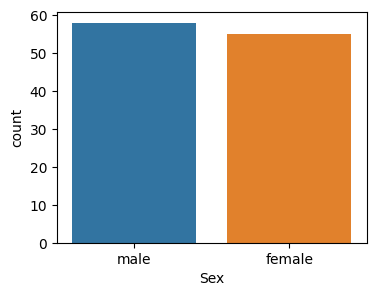

In [111]:
print(underage_df['Sex'].value_counts());
plt.figure(figsize=(4,3))
sns.countplot(x="Sex", data=underage_df)
plt.show() 

1. Total underage male were 58
2. Total underage female were 55

In [112]:
# total population on board
total_passenger = train_dataset['Survived'].value_counts().sum()
total_passenger

891

In [113]:
# total underage population on board
total_underage = underage_df['Survived'].value_counts().sum()
total_underage

113

In [114]:
# sample/poupulation
# sample = total numbers of underage
# population = overall passenger on board including adults and underage

print(f'Percantage of underage over total population: {round((total_underage/total_passenger)*100,2)}%')

Percantage of underage over total population: 12.68%


In [115]:
print(f'Total underage survived males: {survived_underage_male["Survived"].value_counts().sum()}')
print(f'Total underage survived females: {survived_underage_female["Survived"].value_counts().sum()}')
print(f'Total underage non-survived males: {non_survived_underage_male["Survived"].value_counts().sum()}')
print(f'Total underage non-survived females: {non_survived_underage_female["Survived"].value_counts().sum()}')


Total underage survived males: 23
Total underage survived females: 38
Total underage non-survived males: 35
Total underage non-survived females: 17


In [116]:
23+38+35+17 == underage_df['Survived'].value_counts().sum()

True

In [117]:
23+38+35+17 

113

In [118]:
print(f'Male underage survival percentage over overall population:{round((survived_underage_male["Survived"].value_counts().sum()/total_passenger),4)}%')

Male underage survival percentage over overall population:0.0258%


In [119]:
print(f'Female underage survival percentage over overall population:{round((survived_underage_female["Survived"].value_counts().sum()/total_passenger),4)}%')

Female underage survival percentage over overall population:0.0426%


### UUNDERAGE DECK

#### Survival rate of underage according to PClass

In [120]:
survived_underage_male.tail(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
869,870,1,3,male,4.0,1,1,347742,11.1333,S,1,GNR


In [121]:
# columns and rows
survived_underage_male.shape

(23, 12)

In [122]:
# underage male survived according to Pclass 1
grouped_by_pclass = survived_underage_male.groupby('Pclass')
pclass1_underage_male = grouped_by_pclass.get_group(1)
pclass1_underage_male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
305,306,1,1,male,0.92,1,2,113781,151.5500,S,1,C
445,446,1,1,male,4.00,0,2,33638,81.8583,S,1,A
550,551,1,1,male,17.00,0,2,17421,110.8833,C,1,C
802,803,1,1,male,11.00,1,2,113760,120.0000,S,1,B


In [123]:
pclass1_underage_male.value_counts().sum()

4

In [124]:
# underage male survived according to Pclass 2
grouped_by_pclass = survived_underage_male.groupby('Pclass')
pclass2_underage_male = grouped_by_pclass.get_group(2)
pclass2_underage_male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
78,79,1,2,male,0.83,0,2,248738,29.0000,S,1,GNR
183,184,1,2,male,1.00,2,1,230136,39.0000,S,1,F
193,194,1,2,male,3.00,1,1,230080,26.0000,S,1,F
340,341,1,2,male,2.00,1,1,230080,26.0000,S,1,F
407,408,1,2,male,3.00,1,1,29106,18.7500,S,1,GNR
549,550,1,2,male,8.00,1,1,C.A. 33112,36.7500,S,1,GNR
755,756,1,2,male,0.67,1,1,250649,14.5000,S,1,GNR
827,828,1,2,male,1.00,0,2,S.C./PARIS 2079,37.0042,C,1,GNR
831,832,1,2,male,0.83,1,1,29106,18.7500,S,1,GNR


In [125]:
pclass2_underage_male.value_counts().sum()

9

In [126]:
# underage male survived according to Pclass 3
grouped_by_pclass = survived_underage_male.groupby('Pclass')
pclass3_underage_male = grouped_by_pclass.get_group(3)
pclass3_underage_male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
125,126,1,3,male,12.00,1,0,2651,11.2417,C,1,GNR
165,166,1,3,male,9.00,0,2,363291,20.5250,S,1,GNR
220,221,1,3,male,16.00,0,0,SOTON/OQ 392089,8.0500,S,1,GNR
261,262,1,3,male,3.00,4,2,347077,31.3875,S,1,GNR
348,349,1,3,male,3.00,1,1,C.A. 37671,15.9000,S,1,GNR
489,490,1,3,male,9.00,1,1,C.A. 37671,15.9000,S,1,GNR
751,752,1,3,male,6.00,0,1,392096,12.4750,S,1,E
788,789,1,3,male,1.00,1,2,C.A. 2315,20.5750,S,1,GNR
803,804,1,3,male,0.42,0,1,2625,8.5167,C,1,GNR
869,870,1,3,male,4.00,1,1,347742,11.1333,S,1,GNR


In [127]:
pclass3_underage_male.value_counts().sum()

10

In [128]:
#validation
pclass1_underage_male.value_counts().sum() + pclass2_underage_male.value_counts().sum() + pclass3_underage_male.value_counts().sum() 

23

In [129]:
# Total evaluation of survived underage male
print(f'PClass1 survived underage males: {pclass1_underage_male.value_counts().sum()}')
print(f'PClass2 survived underage males: {pclass2_underage_male.value_counts().sum()}')
print(f'PClass3 survived underage males: {pclass3_underage_male.value_counts().sum()}')

PClass1 survived underage males: 4
PClass2 survived underage males: 9
PClass3 survived underage males: 10


### Obesrvation: 
    PClass1 survived underage males: 4
        
    PClass2 survived underage males: 9
        
    PClass3 survived underage males: 10
    

In [130]:
survived_underage_female.tail(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
875,876,1,3,female,15.0,0,0,2667,7.225,C,2,GNR


In [131]:
survived_underage_female.shape

(38, 12)

In [132]:
# underage female survived according to Pclass 1
grouped_by_pclass = survived_underage_female.groupby('Pclass')
pclass1_underage_female = grouped_by_pclass.get_group(1)
pclass1_underage_female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
307,308,1,1,female,17.0,1,0,PC 17758,108.9000,C,3,C
329,330,1,1,female,16.0,0,1,111361,57.9792,C,2,B
435,436,1,1,female,14.0,1,2,113760,120.0000,S,2,B
504,505,1,1,female,16.0,0,0,110152,86.5000,S,2,B
689,690,1,1,female,15.0,0,1,24160,211.3375,S,2,B
781,782,1,1,female,17.0,1,0,17474,57.0000,S,3,B
853,854,1,1,female,16.0,0,1,PC 17592,39.4000,S,2,D


In [133]:
pclass1_underage_female.value_counts().sum()

7

In [134]:
# underage female survived according to Pclass 2
grouped_by_pclass = survived_underage_female.groupby('Pclass')
pclass2_underage_female = grouped_by_pclass.get_group(2)
pclass2_underage_female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
9,10,1,2,female,14.0,1,0,237736,30.0708,C,3,GNR
43,44,1,2,female,3.0,1,2,SC/Paris 2123,41.5792,C,2,GNR
58,59,1,2,female,5.0,1,2,C.A. 34651,27.7500,S,2,GNR
84,85,1,2,female,17.0,0,0,SO/C 14885,10.5000,S,2,GNR
237,238,1,2,female,8.0,0,2,C.A. 31921,26.2500,S,2,GNR
389,390,1,2,female,17.0,0,0,SC 1748,12.0000,C,2,GNR
446,447,1,2,female,13.0,0,1,250644,19.5000,S,2,GNR
530,531,1,2,female,2.0,1,1,26360,26.0000,S,2,GNR
535,536,1,2,female,7.0,0,2,F.C.C. 13529,26.2500,S,2,GNR
618,619,1,2,female,4.0,2,1,230136,39.0000,S,2,F


In [135]:
pclass2_underage_female.value_counts().sum()

12

In [136]:
# underage female survived according to Pclass 3
grouped_by_pclass = survived_underage_female.groupby('Pclass')
pclass3_underage_female = grouped_by_pclass.get_group(3)
pclass3_underage_female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
10,11,1,3,female,4.00,1,1,PP 9549,16.7000,S,2,G
22,23,1,3,female,15.00,0,0,330923,8.0292,Q,2,GNR
39,40,1,3,female,14.00,1,0,2651,11.2417,C,2,GNR
68,69,1,3,female,17.00,4,2,3101281,7.9250,S,2,GNR
156,157,1,3,female,16.00,0,0,35851,7.7333,Q,2,GNR
172,173,1,3,female,1.00,1,1,347742,11.1333,S,2,GNR
184,185,1,3,female,4.00,0,2,315153,22.0250,S,2,GNR
208,209,1,3,female,16.00,0,0,367231,7.7500,Q,2,GNR
233,234,1,3,female,5.00,4,2,347077,31.3875,S,2,GNR
381,382,1,3,female,1.00,0,2,2653,15.7417,C,2,GNR


In [137]:
pclass3_underage_female.value_counts().sum()

19

In [138]:
#validation
pclass1_underage_female.value_counts().sum() + pclass2_underage_female.value_counts().sum() + pclass3_underage_female.value_counts().sum() 

38

In [139]:
# Total evaluation of survived underage female
print(f'PClass1 survived underage females: {pclass1_underage_female.value_counts().sum()}')
print(f'PClass2 survived underage females: {pclass2_underage_female.value_counts().sum()}')
print(f'PClass3 survived underage females: {pclass3_underage_female.value_counts().sum()}')

PClass1 survived underage females: 7
PClass2 survived underage females: 12
PClass3 survived underage females: 19


### Observation: 
    
PClass1 survived underage females: 7

PClass2 survived underage females: 12

PClass3 survived underage females: 19
    

#### Non - Survival rate of underage according to PClass

In [140]:
non_survived_underage_male.tail(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
850,851,0,3,male,4.0,4,2,347082,31.275,S,1,GNR


In [141]:
non_survived_underage_male.shape

(35, 12)

In [142]:
# underage male non survived according to Pclass 3
grouped_by_pclass = non_survived_underage_male.groupby('Pclass')
pclass3_underage_male_non_survival = grouped_by_pclass.get_group(3)
pclass3_underage_male_non_survival.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
787,788,0,3,male,8.0,4,1,382652,29.1250,Q,1,GNR
819,820,0,3,male,10.0,3,2,347088,27.9000,S,1,GNR
824,825,0,3,male,2.0,4,1,3101295,39.6875,S,1,GNR
844,845,0,3,male,17.0,0,0,315090,8.6625,S,1,GNR
850,851,0,3,male,4.0,4,2,347082,31.2750,S,1,GNR


In [143]:
pclass3_underage_male_non_survival.shape

(33, 12)

In [144]:
print(f'PClass 3 non survival counts : {pclass3_underage_male_non_survival.value_counts().sum()}')

PClass 3 non survival counts : 33


In [145]:
# underage male non survived according to Pclass 2
grouped_by_pclass = non_survived_underage_male.groupby('Pclass')
pclass2_underage_male_non_survival = grouped_by_pclass.get_group(2)
pclass2_underage_male_non_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
791,792,0,2,male,16.0,0,0,239865,26.0,S,1,GNR
841,842,0,2,male,16.0,0,0,S.O./P.P. 3,10.5,S,1,GNR


In [146]:
pclass2_underage_male_non_survival.shape

(2, 12)

In [147]:
print(f'PClass 2 non survival counts : {pclass2_underage_male_non_survival.value_counts().sum()}')

PClass 2 non survival counts : 2


In [149]:
# Validation
pclass3_underage_male_non_survival.value_counts().sum() + pclass2_underage_male_non_survival.value_counts().sum()

35

### Obeservation:
    
    pclass1 has zero underage males casulaties. 
    pclass2 has 2 underage non-survival males
    plcass3 has 33 underage males non-survival

In [ ]:
non_survived_underage_female.tail(1)

In [ ]:
non_survived_underage_female.shape

In [ ]:
non_survived_underage_female.value_counts().sum()

In [ ]:
# underage male non survived according to Pclass 3
grouped_by_pclass = non_survived_underage_female.groupby('Pclass')
pclass3_underage_female_non_survival = grouped_by_pclass.get_group(3)
pclass3_underage_female_non_survival.tail()

In [ ]:
print(f'Total underage female non-survival on Pclass3 : {pclass3_underage_female_non_survival.value_counts().sum()}')

In [ ]:
# underage male non survived according to Pclass 
grouped_by_pclass = non_survived_underage_female.groupby('Pclass')
pclass1_underage_female_non_survival = grouped_by_pclass.get_group(1)
pclass1_underage_female_non_survival

In [ ]:
print(f'Total underage female non-survival on Pclass1 : {pclass1_underage_female_non_survival.value_counts().sum()}')

### Observation: 
    Total underage female non-survival on Pclass2 are zero
    Total underage female non-survival on Pclass3 are 16
    Total underage female non-survival on Pclass1 are 1
    
    

## <font color='red'>Conclusion:




### 1. What is the most important factor in determining survival of the Titanic incident?

Passengers in third class have the non highest survival rate and most populated pessenger class, and wealth played a significant role in the factors that determined highest survival because first-class passengers were closer to the deck (and thus the lifeboats) than passengers who lived below deck.




2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Data dosen't show clear picture about prefernce but survival rate of upper class is higher, which indirectly says that the placement of the lifeboats on the deck where favorable for first and second class passengers. disregard of third-class passengers who were left on their own to fend for themselves and had to walk onto the boat deck.



### 3. “Women and children first”. Was this the case?

Female passengers had much better survival rate than males. During the evacuation time, female passengers were the first to be evacuated and that in all classes, female survivorship rates are greater.

Male survivorship is extremely low, and since First Class is a premium class located close to the evacuation zone, we have witnessed the highest number of male survivors. Rest continues to decline.

On the first and second classes, respectively, 96% and 92% of the ladies were able to survive.
while studying, dataset and my observation says, there were total 577 males and 314 females
468 male were non survival and 109 were survival. when it comes to female, 233 females are survived and 81 females has lost their life.


Male Survival Percentage on overall male populations is 18.89 % and Female Survival Percentage on overall femlae populations is 74.20 %


when it comes to children below 18 year olds,

PClass1 survived underage males: 4 , PClass2 survived underage males: 9 ,and PClass3 survived underage males: 10

PClass1 survived underage females: 7, PClass2 survived underage females: 12 ,and PClass3 survived underage females: 19


pclass1 has zero underage males casulaties, pclass2 has 2 underage non-survival males, and plcass3 has 33 underage males non-survival


Total underage female non-survival on Pclass2 are zero, Total underage female non-survival on Pclass3 are 16, and Total underage female non-survival on Pclass1 are 1

Total underage survived males: 23

Total underage survived females: 38

Total underage non-survived males: 35

Total underage non-survived females: 17


### 4. Add one other observation you have noticed in the dataset

1. In every class against men, the female gender outperforms it on the ship. 

2. First Class people have a low casulity rate. 

4. Co-linear Pclass and Fair will explain the same impact on the Targer variable. Your chances of survival do increase as Fair and class levels rise. 

5. In comparison to Pclass=2, males showed a higher survival rate in Pclass=3 for C and Q ports.

6. Most passengers are in 15-35 age range

7. Largest number of 15-25 year olds did not surivied 

8. Oldest passenger survived (age = 80)